## 读取叶绿素a和藻密度的逐日的置信区间

/tmp/ipykernel_30407/1007581316.py:84: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30407/1007581316.py:84: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30407/1007581316.py:84: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30407/1007581316.py:84: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30407/1007581316.py:84: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30407/1007581316.py:84: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30407/1007581316.py:84: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from current font.
  plt.

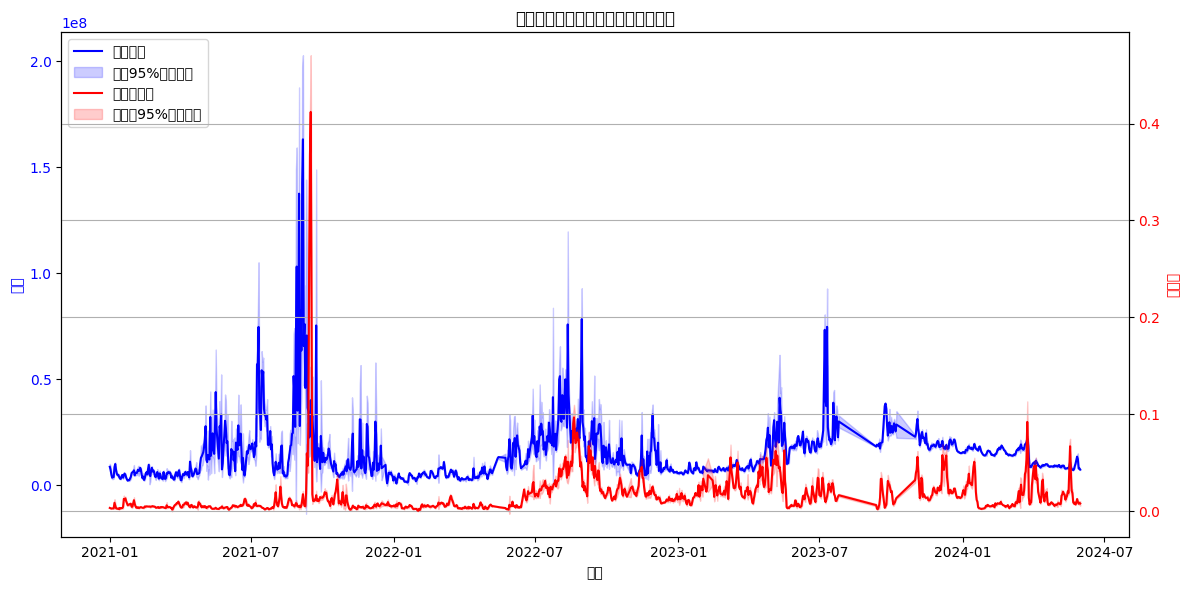

In [21]:
import datetime
import csv
import aie
import pandas as pd
import numpy as np
import chardet
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 步骤1: 检测并读取数据文件
csv_file = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241107/001-lanshanzui.csv'
csv_file_MCD = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241107/001-lMCD18C2_061_20241027_插值填充-lanshanzui.csv'
csv_file_MOD = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241107/001-lMOD09GA_061_20241029_插值填充-lanshanzui.csv'
csv_file_weather = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241107/001-weather_data_兰山嘴_sorted.csv'

with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv(csv_file, encoding=result['encoding'])

# 步骤2: 数据预处理
# 转换日期格式并设置为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 步骤3: 对密度和叶绿素数据进行处理
# 对密度和叶绿素列进行线性插值
df['density'] = df['density'].interpolate(method='linear')
df['chla'] = df['chla'].interpolate(method='linear')

# 计算每日统计数据
daily_density_stats = df['density'].resample('D').agg(['mean', 'std', 'count'])
daily_chla_stats = df['chla'].resample('D').agg(['mean', 'std', 'count'])

# 计算密度和叶绿素的95%置信区间
density_ci = 1.96 * daily_density_stats['std'] / np.sqrt(daily_density_stats['count'])
chla_ci = 1.96 * daily_chla_stats['std'] / np.sqrt(daily_chla_stats['count'])

daily_density_stats['lower_ci'] = daily_density_stats['mean'] - density_ci
daily_density_stats['upper_ci'] = daily_density_stats['mean'] + density_ci
daily_chla_stats['lower_ci'] = daily_chla_stats['mean'] - chla_ci
daily_chla_stats['upper_ci'] = daily_chla_stats['mean'] + chla_ci

# 线性插值
daily_density_interpolated = daily_density_stats.interpolate(method='linear')
daily_chla_interpolated = daily_chla_stats.interpolate(method='linear')

# 创建双y轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制密度数据（左y轴）
ax1.plot(daily_density_interpolated.index, daily_density_interpolated['mean'], 'b-', label='平均密度')
ax1.fill_between(daily_density_interpolated.index,
                 daily_density_interpolated['lower_ci'],
                 daily_density_interpolated['upper_ci'],
                 color='b', alpha=0.2, label='密度95%置信区间')
ax1.set_xlabel('日期')
ax1.set_ylabel('密度', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建右y轴
ax2 = ax1.twinx()

# 绘制叶绿素数据（右y轴）
ax2.plot(daily_chla_interpolated.index, daily_chla_interpolated['mean'], 'r-', label='平均叶绿素')
ax2.fill_between(daily_chla_interpolated.index,
                 daily_chla_interpolated['lower_ci'],
                 daily_chla_interpolated['upper_ci'],
                 color='r', alpha=0.2, label='叶绿素95%置信区间')
ax2.set_ylabel('叶绿素', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('藻类密度与叶绿素浓度时间序列对比')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
import datetime
import csv
import aie
import pandas as pd
import numpy as np
import chardet
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 步骤1: 检测并读取数据文件
csv_file = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241107/001-lanshanzui.csv'
csv_file_MCD = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241107/001-lMCD18C2_061_20241027_插值填充-lanshanzui.csv'
csv_file_MOD = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241107/001-lMOD09GA_061_20241029_插值填充-lanshanzui.csv'
csv_file_weather = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241107/001-weather_data_兰山嘴_sorted.csv'

with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv(csv_file, encoding=result['encoding'])

# 步骤2: 数据预处理
# 转换日期格式并设置为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 步骤3: 对密度和叶绿素数据进行处理
# 对密度和叶绿素列进行线性插值
df['density'] = df['density'].interpolate(method='linear')
df['chla'] = df['chla'].interpolate(method='linear')

# 计算每日统计数据
daily_density_stats = df['density'].resample('D').agg(['mean', 'std', 'count'])
daily_chla_stats = df['chla'].resample('D').agg(['mean', 'std', 'count'])

# 计算密度和叶绿素的95%置信区间
density_ci = 1.96 * daily_density_stats['std'] / np.sqrt(daily_density_stats['count'])
chla_ci = 1.96 * daily_chla_stats['std'] / np.sqrt(daily_density_stats['count'])

daily_density_stats['lower_ci'] = daily_density_stats['mean'] - density_ci
daily_density_stats['upper_ci'] = daily_density_stats['mean'] + density_ci
daily_chla_stats['lower_ci'] = daily_chla_stats['mean'] - chla_ci
daily_chla_stats['upper_ci'] = daily_chla_stats['mean'] + chla_ci

# 线性插值
daily_density_interpolated = daily_density_stats.interpolate(method='linear')
daily_chla_interpolated = daily_chla_stats.interpolate(method='linear')

# 读取所有CSV文件
df_station = pd.read_csv(csv_file, encoding=result['encoding'])
df_mcd = pd.read_csv(csv_file_MCD)
df_mod = pd.read_csv(csv_file_MOD) 
df_weather = pd.read_csv(csv_file_weather)

# 转换日期格式
df_station['date'] = pd.to_datetime(df_station['date'])
df_mcd['date'] = pd.to_datetime(df_mcd['date'])
df_mod['date'] = pd.to_datetime(df_mod['date'])
df_weather['time'] = pd.to_datetime(df_weather['time'])

# 对站点数据按日期分组计算统计量
station_daily = df_station.groupby(df_station['date'].dt.date).agg({
    'temperature': 'mean',
    'pH': 'mean', 
    'oxygen': 'mean',
    'permanganate': 'mean',
    'NH': 'mean',
    'TP': 'mean',
    'TN': 'mean',
    'conductivity': 'mean',
    'turbidity': 'mean'
}).reset_index()

# 对天气数据按日期分组
df_weather['date'] = df_weather['time'].dt.date
weather_daily = df_weather.drop('time', axis=1).groupby('date').agg({
    'area': 'first',
    'weather': 'first',
    'max_temperature': 'mean',
    'min_temperature': 'mean',
    'aqi': 'mean',
    'aqiLevel': 'mean',
    'wind_direction': 'first',
    'wind_power': 'first',
    'aqiInfo': 'first'
}).reset_index()

# 对MOD数据按日期分组取平均值
df_mod['date'] = df_mod['date'].dt.date
mod_daily = df_mod.groupby('date').mean().reset_index()

# 合并所有数据
merged_df = pd.merge(station_daily, weather_daily, on='date', how='outer')
merged_df = pd.merge(merged_df, mod_daily, on='date', how='outer')

# 将daily_density_interpolated和daily_chla_interpolated的索引转换为日期格式
daily_density_interpolated.index = daily_density_interpolated.index.date
daily_chla_interpolated.index = daily_chla_interpolated.index.date

# 创建包含密度和叶绿素统计数据的DataFrame
stats_df = pd.DataFrame({
    'date': daily_density_interpolated.index,
    'density_mean': daily_density_interpolated['mean'],
    'density_lower': daily_density_interpolated['lower_ci'],
    'density_upper': daily_density_interpolated['upper_ci'],
    'chla_mean': daily_chla_interpolated['mean'],
    'chla_lower': daily_chla_interpolated['lower_ci'],
    'chla_upper': daily_chla_interpolated['upper_ci']
})

# 合并统计数据
merged_df = pd.merge(merged_df, stats_df, on='date', how='outer')

# 按日期排序
merged_df = merged_df.sort_values('date')

# 保存合并后的数据
merged_df.to_csv('merged_all_data.csv', index=False)

print("数据合并完成。输出前5行:")
print(merged_df.head())


数据合并完成。输出前5行:
         date  temperature        pH     oxygen  permanganate        NH  \
0  2021-01-01     3.600000  7.521667  12.690000      4.210000  0.025000   
1  2021-01-02     3.766667  7.511667  12.691667      3.700000  0.025000   
2  2021-01-03     4.200000  7.531667  12.785000      3.470000  0.025000   
3  2021-01-04     4.833333  7.505000  12.690000      3.376667  0.025333   
4  2021-01-05     5.433333  7.508333  12.516667      3.481667  0.035167   

         TP        TN  conductivity   turbidity  ... density_mean_x  \
0  0.110000  6.051667    382.083333  147.150000  ...            NaN   
1  0.083500 -1.000000    392.466667  108.400000  ...   7.334620e+06   
2  0.067833 -1.000000    416.016667   79.283333  ...   5.136342e+06   
3  0.056333 -0.453333    413.783333   70.183333  ...   3.622895e+06   
4  0.058333 -1.000000    413.866667   67.666667  ...   3.845083e+06   

  density_lower_x  density_upper_x       FAI  density_mean_y  density_lower_y  \
0             NaN          

In [ ]:
# 处理缺失值
# 对数值型列使用前向填充和后向填充
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numeric_columns] = merged_df[numeric_columns].fillna(method='ffill').fillna(method='bfill')

# 对分类列使用众数填充
categorical_columns = ['area', 'weather', 'wind_direction', 'wind_power', 'aqiInfo']
for col in categorical_columns:
    if col in merged_df.columns:
        mode_value = merged_df[col].mode()[0]
        merged_df[col].fillna(mode_value, inplace=True)

print("缺失值处理完成。剩余缺失值统计:")
print(merged_df.isnull().sum())

# 将插值后的数据保存到新的CSV文件
merged_df.to_csv('merged_all_data_interpolated.csv', index=False)
print("插值后的数据已保存到 merged_all_data_interpolated.csv")


In [29]:
# 读取CSV文件
merged_df = pd.read_csv('merged_all_data_interpolated.csv')

# 将date列转换为datetime格式
merged_df['date'] = pd.to_datetime(merged_df['date'])

# 筛选日期范围到2024年5月31日
end_date = pd.Timestamp('2024-05-31')
merged_df = merged_df[merged_df['date'] <= end_date]

# 保存筛选后的数据
merged_df.to_csv('merged_all_data_filtered.csv', index=False)

print("筛选后的数据范围:")
print(f"起始日期: {merged_df['date'].min()}")
print(f"结束日期: {merged_df['date'].max()}")
print(f"数据条数: {len(merged_df)}")
print("筛选后的数据已保存到 merged_all_data_filtered.csv")


筛选后的数据范围:
起始日期: 2021-01-01 00:00:00
结束日期: 2024-05-31 00:00:00
数据条数: 1247
筛选后的数据已保存到 merged_all_data_filtered.csv
